# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

Let's first visualize the data:


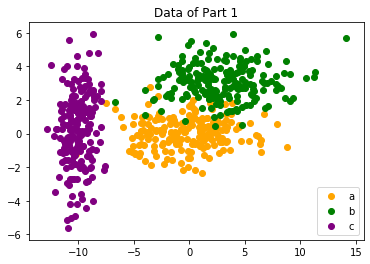

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data 
plt.scatter(a[:,0],a[:,1],label='a',c='orange')
plt.scatter(b[:,0],b[:,1],label='b',c='green')
plt.scatter(c[:,0],c[:,1],label='c',c='purple')

plt.title('Data of Part 1')
plt.axis()
plt.legend(loc=4)
plt.show()


#### 1.1.1 Preliminary Points

In Bayesian classification, if, for example, we have two classes, we compare the maximum a posteriori probabilities, thus we have<br />
$P(w_1|x)>P(w_2|x)$ or $P(w_1|x)<P(w_2|x)$. <br />
Equaivalently, we can have <br />
$P(x|w_1)P(w_1)>P(x|w_2)P(w_2)$ or $P(x|w_1)P(w_1)<P(x|w_2)P(w_2)$

Since, accroding to Baye rule, we have <br />
$P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)}$ <br />

The above result can be generalized to $n$ classes. <br />
The decision surface between classes $i$ and $j$ has the equation: <br />
$P(w_i|x) - P(w_j|x) = 0$

We can also write it as <br />
$g_i(x) = f(P(w_i|x))$ <br />

where $f(.)$ is a monotonally increasing function, called __discriminant function__. <br />

Decision will thus be taken to assign the feature vector to class $w_i$ if $g_i(x) > g_j(x)$ for all $i \neq j$ <br />
Now, The decision surface is given by <br />
$g_{ij}(x) = g_i(x) - g_j(x) = 0$

According to __Normal law__, the pdfs follow a Gaussian law. Thus, for every class $w_i$, we have  <br />
$$
\begin{aligned}
g_i(x) & = \text{ln}(P(x|w_i)P(w_i)) = \text{ln}P(x|w_i) +\text{ln}P(w_i) \\
 & = -\frac{1}{2}x^T\Sigma_i^{-1}x + \frac{1}{2}x^T\Sigma_i^{-1}\mu_i + -\frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i + \frac{1}{2}\mu_i^T\Sigma_i^{-1}x  + \text{ln}P(w_i) + c_i
\end{aligned}
$$ <br />

where $\mu_i$ the mean of class $w_i$ and $\Sigma_i$ is the covariance matrix of size $l \times l$, defined by <br />

$\Sigma_i = \mathbb{E}[(x - \mu_i)(x - \mu_i)^T]$

Based on values for $\Sigma_i$, there will be 3 different scenarios for the discriminat functions and the decision curves: <br />
1. $\Sigma_i$ is identical for all classes: $\Sigma_i = \Sigma$: The discriminant functions are linear and the decision curves (surfaces) are hyperplanes since we have 
    * $g_i(x) = (\Sigma^{-1}\mu_i)^Tx + \text{ln}P(w_i) - \frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i$

2. $\Sigma$ is diagonal with equal values on the diagonal. i.e., $\Sigma =\sigma2I$: 
    * The discriminant functions becomes: <br />
    $g_i(x) = \frac{1}{\sigma^2}\mu_i^Tx + \text{ln}P(w_i) - \frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i$
    * The decision hyperplanes are:<br />
    $g_{ij} = (\mu_i - \mu_j)^T(x - [\frac{1}{2}(\mu_i + \mu_j) - \sigma^2\text{ln}(\frac{P(w_i)}{P(w_j)})\frac{\mu_i - \mu_j}{||\mu_i - \mu_j ||^2}] ) = 0$
3. If $\Sigma$ is different from $\sigma2I$ 
    * The decision hyperplanes are:<br />
    $g_{ij} = (\Sigma^{-1}(\mu_i - \mu_j))^T(x - [\frac{1}{2}(\mu_i + \mu_j) - \text{ln}(\frac{P(w_i)}{P(w_j)})\frac{\mu_i - \mu_j}{||\mu_i - \mu_j ||_{\Sigma^{-1}}^2}] ) = 0 $ <br />
    


#### 1.1.2 Distribution Hypotheses
The dataset can be modeled by Gaussian probability distribution. The prior probabilities for the three classes are equal since there are equal number data points in each of the three classes, i.e., <br />
$P(w_1) = P(w_2) = P(w_3) = \frac{1}{3}$

Now, to see which of the three above scenarios apply to the discriminat functions and the decision curves of classes in our data, we compute the mean and covariance matrices of each of the three classes:


In [4]:
# Calculate the mean and covaiance of each class 
mu_a = a.mean(axis=0)
mu_b = b.mean(axis=0)
mu_c = c.mean(axis=0)

sigma_a = np.cov(np.transpose(a))
sigma_b = np.cov(np.transpose(b))
sigma_c = np.cov(np.transpose(c))


In [5]:
# Prin the mean and covariance matrix for class a (rounded to the nearest integer)
print('Mean of class a:')
print(mu_a.round())
print('Covariance matrix of class a:')
print(sigma_a.round())

Mean of class a:
[-0.  0.]
Covariance matrix of class a:
[[10.  0.]
 [ 0.  1.]]


In [6]:
# Prin the mean and covariance matrix for class b (rounded to the nearest integer)
print('Mean of class b:')
print(mu_b.round())
print('Covariance matrix of class b:')
print(sigma_b.round())

Mean of class b:
[3. 3.]
Covariance matrix of class b:
[[10.  0.]
 [ 0.  1.]]


In [7]:
# Prin the mean and covariance matrix for class c (rounded to the nearest integer)
print('Mean of class c:')
print(mu_c.round())
print('Covariance matrix of class c:')
print(sigma_c.round())

Mean of class c:
[-10.   0.]
Covariance matrix of class c:
[[1. 0.]
 [0. 5.]]


#### 1.1.3 Discriminant Functions and Decision Curves 
We see that the (estimated) covariance matrix $\Sigma$ of classes $a$ and $b$ are similar. Hence, the quadratic terms will disappear in the equation of the decision curves, as well as the constant $c_i$. However, the convariance matrix of class $c$ is different from both classes $a$ and $b$. Therefore, the decision curves between the classes can be calculated as follows 
1. Decision curve between $a$ and $b$: $\frac{(x - \mu_{a1})^2}{(\sigma_{a1}^2)}  + \frac{(y - \mu_{a2})^2}{(\sigma_{a2}^2)} =  \frac{(x - \mu_{b1})^2}{(\sigma_{b1}^2)}  + \frac{(y - \mu_{b2})^2}{(\sigma_{b2}^2)}  $

2. Decision curve between $a$ and $c$: $-\frac{1}{2}[\frac{(x - \mu_{a1})^2}{(\sigma_{a1}^2)}  + \frac{(y - \mu_{a2})^2}{(\sigma_{a2}^2)}] + \text{ln}\frac{1}{\sqrt{\sigma_{a1}^2 + \sigma_{a2}^2}} = -\frac{1}{2}[\frac{(x - \mu_{c1})^2}{(\sigma_{c1}^2)}  + \frac{(y - \mu_{c2})^2}{(\sigma_{c2}^2)}] + \text{ln}(\frac{1}{\sqrt{\sigma_{c1}^2 + \sigma_{c2}^2}})$

3. Decision curve between $b$ and $c$: $-\frac{1}{2}[\frac{(x - \mu_{b1})^2}{(\sigma_{b1}^2)}  + \frac{(y - \mu_{b2})^2}{(\sigma_{b2}^2)}] + \text{ln}\frac{1}{\sqrt{\sigma_{b1}^2 + \sigma_{b2}^2}} = -\frac{1}{2}[\frac{(x - \mu_{c1})^2}{(\sigma_{c1}^2)}  + \frac{(y - \mu_{c2})^2}{(\sigma_{c2}^2)}] + \text{ln}(\frac{1}{\sqrt{\sigma_{c1}^2 + \sigma_{c2}^2}})$

In [8]:
# Calculate mean and covariance matix
def get_mean_cov(data):
    mean = data.mean(axis=0)
    sigma=(np.dot((data- mean).T, data - mean)/len(data))
    # get and estimate by rounding to nearest integer
    return mean.round(),sigma.round()

In [9]:
# Calculate the coefficients of decision curve
def get_decision_curve_coeffs(d1,d2):
    mu_1,sigma_1=get_mean_cov(d1)
    mu_2,sigma_2=get_mean_cov(d2)
    mu_11,mu_12=mu_1[0],mu_1[1]
    mu_21,mu_22=mu_2[0],mu_2[1]
    
    sigma_11,sigma_12=sigma_1[0][0],sigma_1[1][1]
    sigma_21,sigma_22=sigma_2[0][0],sigma_2[1][1]
    
    coef_x_2=(sigma_21-sigma_11)*sigma_12*sigma_22
    coef_x_1=(-2*mu_11*sigma_21+2*mu_21*sigma_11)*sigma_12*sigma_22
    coef_y_2=(sigma_22-sigma_12)*sigma_11*sigma_21
    coef_y_1=(-2*mu_12*sigma_22+2*mu_22*sigma_12)*sigma_11*sigma_21
    coef_constant_1=mu_11*mu_11*sigma_12*sigma_21*sigma_22+mu_12*mu_12*sigma_11*sigma_21*sigma_22
    coef_constant_2=-mu_21*mu_21*sigma_11*sigma_12*sigma_22-mu_22*mu_22*sigma_11*sigma_12*sigma_21
    coef_constant=coef_constant_1+coef_constant_2
    
    temp = np.array([coef_x_2,coef_x_1,coef_y_2,coef_y_1,coef_constant])
    temp = temp[np.flatnonzero(temp)]
    temp_min =min(abs(temp))
   
    return int(round(coef_x_2)),int(round(coef_x_1)),int(coef_y_2.round()),int(coef_y_1.round()),int(coef_constant.round())


In [10]:
get_decision_curve_coeffs(a,b)

(0, 60, 0, 600, -990)

Hence, the decision curve between classes $a$ and $b$ is <br />
$60x - 600y - 990 = 0$

In [11]:
get_decision_curve_coeffs(a,c)

(-45, -1000, 40, 0, -5000)

Hence, the decision curve between classes $a$ and $c$ is <br />
$-45x^2 - 1000x + 40y^2 - 5000  = 0$

In [12]:
get_decision_curve_coeffs(b,c)

(-45, -1030, 40, -300, -4505)

Hence, the decision curve between classes $b$ and $c$ is <br />
$-45x^2 - 1030x + 40y^2 - 300y - 4505  = 0$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'label'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'label'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'label'


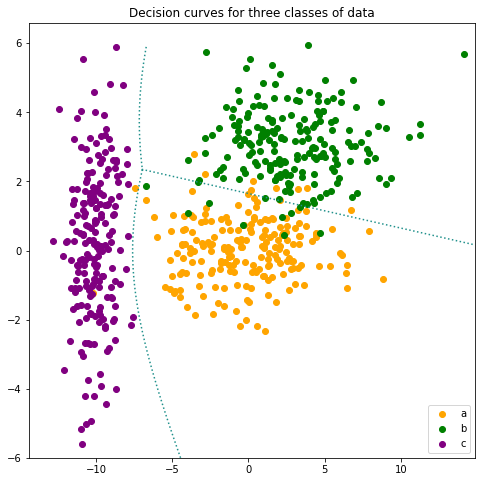

In [13]:
# Plot the decision curves
x1_range = np.arange(-7, 15, 0.1)
y1_range = np.arange(-6, 6, 0.1)
x1_range, y1_range = np.meshgrid(x1_range, y1_range)
curve_ab = 60*x1_range+600*y1_range-990

x2_range = np.arange(-10, 15, 0.1)
y2_range = np.arange(-6, 2.5, 0.1)
x2_range, y2_range = np.meshgrid(x2_range, y2_range)
curve_ac = -45*x2_range*x2_range-1000*x2_range+40*y2_range*y2_range-5000

x3_range = np.arange(-10, 15, 0.1)
y3_range = np.arange(2.3, 6, 0.1)
x3_range, y3_range = np.meshgrid(x3_range, y3_range)
curve_bc = -45*x3_range*x3_range-1030*x3_range+40*y3_range*y3_range-300*y3_range-4505

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.scatter(a[:, 0], a[:, 1],  label = 'a',c='orange')
ax.scatter(b[:, 0], b[:, 1],  label = 'b',c='green')
ax.scatter(c[:, 0], c[:, 1],  label = 'c',c='purple')
ax.contour(x1_range, y1_range, curve_ab, 0,linestyles='dotted',label='curve_ab')
ax.contour(x2_range, y2_range, curve_ac, 0,linestyles='dotted',label='curve_ac')
ax.contour(x3_range, y3_range, curve_bc, 0,linestyles='dotted',label='curve_bc')
plt.title("Decision curves for the three classes of data")
ax.legend(loc=4)
plt.show()


#### 1.1.4 Bayes Method Performance

According to the above plot, the decision curves are calcualted correctly as our Bayes classifier is capable of classifying the data into three classes $a$, $b$, and $c$. Now, to analzye the performance of our classifier, we compute its accuracy in calcualting the labels by calculating the percentage of datapoints that are incorrectly classified: 

In [14]:
# calculate the accuracy of Bayes model
def compute_bayes_accuracy(data,label,class_):
    correct=0
    correct_list=[]
    err = []
    for d in data:
        x=d[0]
        y=d[1]
        if class_=='ab':
            pred=int((60*x + 600*y - 990)>0)
        
        if class_=='ac':
            pred=int((-45*x**2 - 1000*x + 40*y**2 - 5000)>0)
        
        if class_=='bc':
            pred=int((-45*x**2 - 1030*x + 40*y**2 - 300*y - 4505)>0)
        
        if pred==label:
            correct += 1
            correct_list.append(d)
        else:
            err.append(d)
    accuracy = correct/len(data)
    return accuracy,np.array(correct_list),np.array(err)

In [15]:
a1_bayes_acc,a1_correct_bayes,a1_err_bayes=compute_bayes_accuracy(a,0,"ab")
b1_bayes_acc,b1_correct_bayes,b1_err_bayes=compute_bayes_accuracy(b,1,"ab")

a2_bayes_acc,a2_correct_bayes,a2_err_bayes=compute_bayes_accuracy(a,0,"ac")
c1_bayes_acc,c1_correct_bayes,c1_err_bayes=compute_bayes_accuracy(c,1,"ac")

b2_bayes_acc,b2_correct_bayes,b2_err_bayes=compute_bayes_accuracy(b,0,"ac")
c2_bayes_acc,c2_correct_bayes,c2_err_bayes=compute_bayes_accuracy(c,1,"ac")

print('Accuracy of Bayes Method for class a is '+str((a1_bayes_acc + a2_bayes_acc)/2))
print('Accuracy of Bayes Method for class b is '+str((b1_bayes_acc + b2_bayes_acc)/2))
print('Accuracy of Bayes Method for class c is '+str((c1_bayes_acc + c2_bayes_acc)/2))


Accuracy of Bayes Method for class a is 0.9724999999999999
Accuracy of Bayes Method for class b is 0.975
Accuracy of Bayes Method for class c is 1.0


We also plot the data:

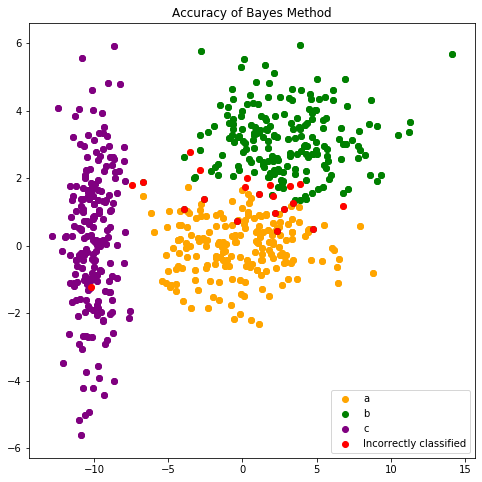

In [16]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.scatter(a1_correct_bayes[:, 0], a1_correct_bayes[:, 1],label ='a',c='orange' )
ax.scatter(a2_correct_bayes[:, 0], a2_correct_bayes[:, 1],c='orange')

ax.scatter(b1_correct_bayes[:, 0], b1_correct_bayes[:, 1],label ='b',c='green' )
ax.scatter(b2_correct_bayes[:, 0], b2_correct_bayes[:, 1],c='green')

ax.scatter(c1_correct_bayes[:, 0], c1_correct_bayes[:, 1],label ='c',c='purple' )
ax.scatter(c2_correct_bayes[:, 0], c2_correct_bayes[:, 1],c='purple')

ax.scatter(a1_err_bayes[:, 0], a1_err_bayes[:, 1], label ='Incorrectly classified',c='red' )
ax.scatter(a2_err_bayes[:, 0], a2_err_bayes[:, 1],c='red')

ax.scatter(b1_err_bayes[:, 0], b1_err_bayes[:, 1],c='red' )
#ax.scatter(b2_err_bayes[:, 0], b2_err_bayes[:, 1], label ='Incorrectly classified',c='red') # this list is empty

#ax.scatter(c1_err_bayes[:, 0], c1_err_bayes[:, 1], label ='Incorrectly classified',c='red') # this list is empty
#ax.scatter(c2_err_bayes[:, 0], c2_err_bayes[:, 1], label ='Incorrectly classified',c='red') # this list is empty

ax.legend()
plt.title("Accuracy of Bayes Method");
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [17]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [18]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

FileNotFoundError: [Errno 2] No such file or directory: '../data/lab-03-data/part2/train-images-idx3-ubyte.gz'

In [ ]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*